## BAG OF N-GRAMS

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["thor is looking ofr job"])
v.vocabulary_

{'thor': 4, 'is': 0, 'looking': 2, 'ofr': 3, 'job': 1}

In [9]:
corpus = [
    "thor ate a pizza",
    "loki is tall",
    "loki is eating a pizza"
]

In [11]:
import spacy 

nlp =spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)

    filtered_tokens =[]

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

preprocess("loki is eating pizza")

'loki eat pizza'

In [13]:
corpus_processed=[preprocess(text) for text in corpus]
corpus_processed

['thor eat pizza', 'loki tall', 'loki eat pizza']

In [14]:
v =CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [16]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [17]:
v.transform(["Hulk  eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [24]:
import pandas as pd 

df = pd.read_json("news_dataset.json")

print(df.shape)
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [25]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [38]:
min_samples = 1381

df_business = df[df.category == "BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category == "SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category == "CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category == "SCIENCE"].sample(min_samples, random_state=2022)


In [40]:
pd.concat([df_business, df_sports, df_crime, df_science], axis=0)

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS
...,...,...
2178,Aquarium To Monitor Animals' Behavior Changes ...,SCIENCE
5682,How Google Glass Could Save Lives In The Hospi...,SCIENCE
1643,Honda's Gravity Modification Research For us A...,SCIENCE
11428,EVERYONE Loves Alternative Facts THE POWER OF ...,SCIENCE


In [52]:
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science], axis=0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [53]:
target = {'BUSINESS':0, 'SPORTS':1, 'CRIME':2, 'SCIENCE':3}

df_balanced['category_num'] = df_balanced.category.map(target)


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,
    random_state= 2022,
    stratify=df_balanced.category_num
)

In [58]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [59]:
y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('multi NB', MultinomialNB()) 
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('multi NB', MultinomialNB()) 
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



In [68]:
X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [69]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [70]:
y_pred[:5]

array([0, 0, 3, 0, 2])

In [71]:
df_balanced['preprocess_txt'] = df_balanced.text.apply(preprocess)

In [72]:
df_balanced.head()

,text,category,category_num,preprocess_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business leader remain confident Face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review Employees wake morning love impo...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment CEO FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,leverage intuition decision making feel safe r...


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,
    random_state= 2022,
    stratify=df_balanced.category_num
)

In [74]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('multi NB', MultinomialNB()) 
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



In [76]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
cm

array([[252,   5,  11,   8],
       [ 38, 203,  31,   5],
       [ 32,   1, 239,   4],
       [ 56,   3,   7, 210]])

Text(95.72222222222221, 0.5, 'Truth')

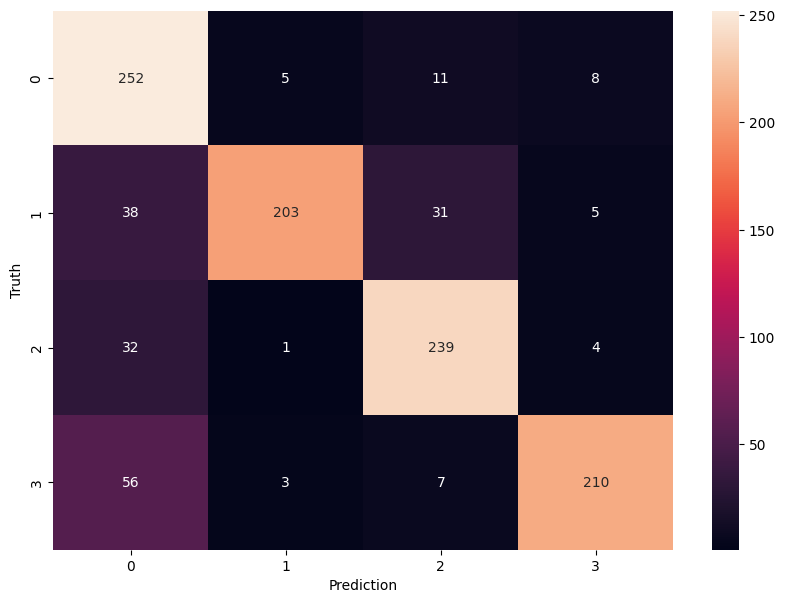

In [77]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')